# Retail Store Analysis. 

# Introduction:
Retail store businesses collect vast amounts of data regarding customer purchases, products, and transactions. Analyzing this data can help identify customer behavior trends, popular product categories, and optimize business operations. Through data analysis, a retail store can make informed decisions on marketing strategies, inventory management, and customer engagement.

# Overview:
This project is ideal for analyzing sales performance, customer behavior, and product preferences, offering opportunities to discover actionable insights such as sales trends, top-performing products, and customer segmentation.

1. Transaction ID: A unique identifier for each transaction, allowing tracking and reference.

2. Date: The date when the transaction occurred, providing insights into sales trends over time.

3. Customer ID: A unique identifier for each customer, enabling customer-centric analysis.

4.Gender: The gender of the customer (Male/Female), offering insights into gender-based purchasing patterns.

5.Age: The age of the customer, facilitating segmentation and exploration of age-related influences.

6.Product Category: The category of the purchased product (e.g., Electronics, Clothing, Beauty), helping understand product preferences.

7.Quantity: The number of units of the product purchased, contributing to insights on purchase volumes.

8.Price per Unit: The price of one unit of the product, aiding in calculations related to total spending.

9.Total Amount: The total monetary value of the transaction, showcasing the financial impact of each purchase.

10. Order ID: A unique identifier for each transaction.

# Problem Statements:
1. Customer Demographics: How do customers' age and gender distributions influence their shopping behavior?
   What are the key demographic segments that drive the most revenue?
2. Product Sales: Which product categories generate the most revenue?
   How do different product categories perform across different demographics?
3. Sales Trend Analysis: How do sales trends vary over time, particularly on a monthly and seasonal basis?
   Are there any significant fluctuations in sales based on specific months or times of the year?
4. Order Patterns:What is the frequency of orders across various time periods?

# Import Liabrary

In [9]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import mysql.connector

# SQL Connection

In [10]:
db = mysql.connector.connect(user='root',
                             password='Devika@131',
                             host='localhost',
                             database='retailstores'
                            )

cur = db.cursor()

# DATA CLEANING.  

# Check for missing values in Products table

In [17]:
query = """
SELECT Product_ID, Product_Category, Quantity, Price_per_Unit
FROM Products
WHERE Product_ID IS NULL OR Product_Category IS NULL OR Quantity IS NULL OR Price_per_Unit IS NULL;
"""
# Execute the query
cur.execute(query)

# Fetch and print the results
data = cur.fetchall()

# Check if any rows were returned
if data:
    print("Rows with missing values:")
    for row in data:
        print(row)
else:
    print("No missing values found.")

No missing values found.


# Check for missing values in Customers table

In [12]:
query = """
SELECT CustomerID, CustomerName, Gender, Age
FROM Customers
WHERE CustomerID IS NULL OR CustomerName IS NULL OR Gender IS NULL OR Age IS NULL;
"""

# Execute the query
cur.execute(query)

# Fetch and print the results
data = cur.fetchall()

# Check if any rows were returned
if data:
    print("Rows with missing values:")
    for row in data:
        print(row)
else:
    print("No missing values found.")


No missing values found.


# check for missing values in the Orders table

In [12]:
query = """
SELECT OrderID, CustomerID, OrderDate, Quantity, Price_per_Unit, TotalAmount
FROM Orders
WHERE OrderID IS NULL 
OR CustomerID IS NULL 
OR OrderDate IS NULL 
OR Quantity IS NULL 
OR Price_per_Unit IS NULL 
OR TotalAmount IS NULL;
"""
# Execute the query
cur.execute(query)
# Fetch and print the results
data = cur.fetchall()
if len(data) == 0:
    print("No missing values found.")
else:
    print("Rows with missing values:")
    for row in data:
        print(row)

No missing values found.


# Remove duplicates in Products table

In [17]:
query = """
SELECT Product_ID, COUNT(*)
FROM Products
GROUP BY Product_ID
HAVING COUNT(*) > 1;
"""
# Execute the query
cur.execute(query)
# Fetch and print the results
data = cur.fetchall()
data

[]

# Remove duplicates in Customers table

In [16]:
query = """
DELETE FROM Customers
WHERE CustomerID IN (SELECT CustomerID FROM (SELECT CustomerID, COUNT(*) FROM Customers GROUP BY CustomerID HAVING COUNT(*) > 1) AS temp);
"""
# Execute the query
cur.execute(query)
# Fetch and print the results
data = cur.fetchall()
data

[]

# Remove duplicates in Orders table

In [ ]:
query = """
DELETE FROM Orders
WHERE OrderID IN (SELECT OrderID FROM (SELECT OrderID, COUNT(*) FROM Orders GROUP BY OrderID HAVING COUNT(*) > 1) AS temp);
"""
# Execute the query
cur.execute(query)
# Fetch and print the results
data = cur.fetchall()
data

# DATA VISUALIZATION. 

# 1. All product catorgory. 
Goal: List all product catorgory that customers buy.

In [9]:
query = """ select distinct Product_Category from Products """
cur.execute(query)
data = cur.fetchall()
data


[('Beauty',), ('Clothing',), ('Electronics',)]

-Understanding the distinct product categories can help in planning inventory better, ensuring that you’re stocking products from a variety of categories in line with demand.
-You can cross-reference the distinct categories with sales data to see which categories are performing best and which ones may need more attention or resources. This allows you to allocate marketing efforts effectively across different product categories.

# 2. Product Category Distribution:.  
Goal: To understand which product categories generate the most sales.

In [11]:
query = """ select upper(Products.Product_Category) Category, 
round(sum(Orders.TotalAmount),2) sales 
from Products join Orders group by Category  """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["category", "sales"])
df

,category,sales
0,BEAUTY,166595.00
1,CLOTHING,212030.00
2,ELECTRONICS,151450.00


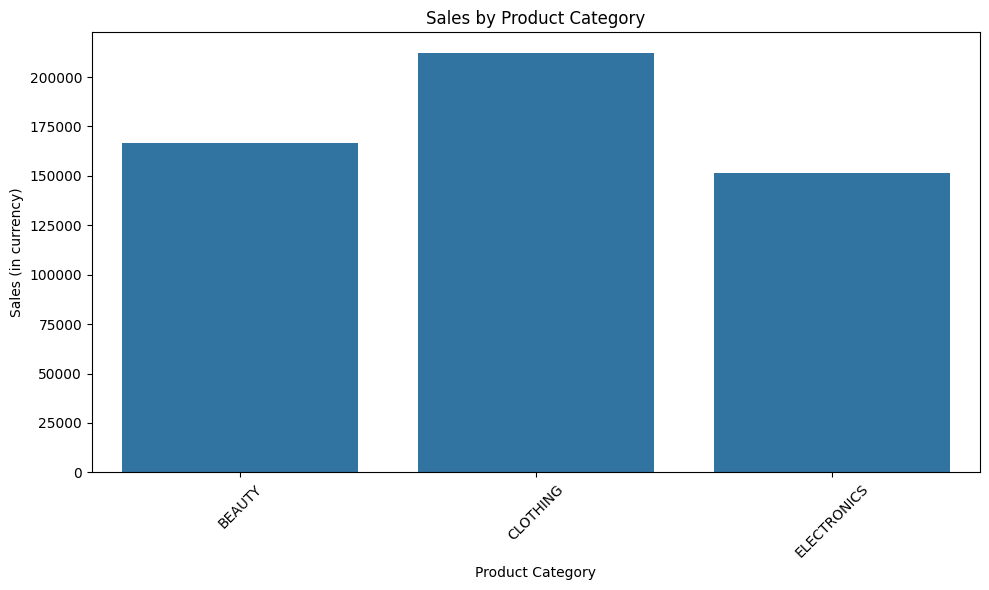

In [12]:
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
sns.barplot(x="category", y="sales", data=df)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales (in currency)')
plt.xticks(rotation=45)  # Rotate category names if they are long
plt.tight_layout()  # Adjust layout for better spacing

# Show the plot
plt.show()

from this visualization we can learn Top-Performing Product Categories,  Low-Performing Categories. For categories with high sales, ensure that inventory is well-stocked to avoid shortages. Conversely, for categories with low sales, assess whether inventory levels can be adjusted to prevent overstocking. This visualization provides a snapshot of how each product category contributes to total sales. You can identify high-performing categories for further investment and areas that might need additional attention to increase sales. By understanding the relative performance of product categories, businesses can optimize inventory, marketing, and sales strategies effectively.

# 3. Calculate the percentage of products where the quantity is More than 1.


In [13]:
query = """ SELECT 
    (SUM(CASE WHEN Quantity > 1 THEN 1 ELSE 0 END) / COUNT(*) * 100) AS percentage
FROM Products; """
cur.execute(query)
data = cur.fetchall()
"The percentage of products where the quantity is More than 1", data[0] [0]

('The percentage of products where the quantity is More than 1',
 Decimal('77.1429'))

- Analyzing the percentage can provide insights into customer purchasing behavior. A high quantity for most products may indicate a strong demand, while a low percentage could mean customers prefer purchasing single items or that they may be testing products before buying larger quantities.
- If the percentage is high, it may reflect a strategy that encourages bulk purchases, possibly leading to increased sales volumes. This could be beneficial in seasonal sales or promotional campaigns.

# 4. count the numbers of males and females
Goal: counts the number of customers grouped by gender.

In [15]:
query = """ SELECT Gender, count(CustomerID)
FROM customers group by Gender; """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Gender", "Customer_count"])
data


[('Male', 16), ('Female', 19)]

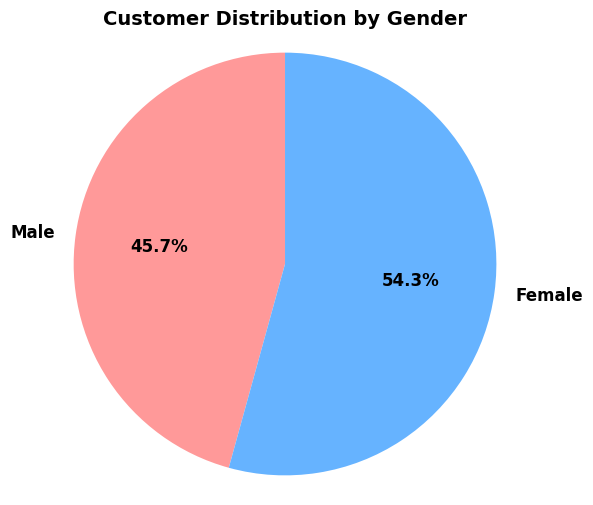

In [16]:
# Calculate percentages
df['Percentage'] = df['Customer_count'] / df['Customer_count'].sum() * 100

# Define bold colors (corrected: colors are now defined)
colors = ['#FF9999', '#66B3FF']  # You can customize or add more colors if needed

# Create a pie chart
plt.figure(figsize=(6, 6))  # Optional: Adjust the figure size

plt.pie(df['Customer_count'], 
        labels=df['Gender'], 
        autopct='%1.1f%%',  # Show percentages
        startangle=90,      # Rotate the start point
        colors=colors,      # Use the bold colors
        textprops={'fontsize': 12, 'weight': 'bold'})  # Bold the text

# Make the chart a circle (equal aspect ratio)
plt.axis('equal')

# Add a title
plt.title('Customer Distribution by Gender', fontsize=14, weight='bold')

# Show the pie chart
plt.show()



-The distribution of customers by gender provides valuable insights into your customer base. Understanding the gender breakdown can inform marketing strategies, product offerings, and customer engagement initiatives.
-Understanding the gender distribution of your customer base is crucial for making informed business decisions. It allows you to create targeted marketing strategies, develop suitable products, and enhance customer engagement. Depending on the results, you can further analyze the correlation between gender, product preferences, and sales performance to optimize your business strategies.

# 5. Calculate no of orders per month. 
Goal: visually compare the sales activity and identify peak months for orders.

In [17]:
query = """ SELECT MONTHNAME(OrderDate) AS Month, COUNT(OrderID) AS OrderCount
FROM Orders
GROUP BY MONTHNAME(OrderDate)
ORDER BY MONTHNAME(OrderDate)  """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Months", "OrderCount"])

# Print or use the DataFrame
print(df)

      Months  OrderCount
0      April           5
1     August           4
2   December           3
3   February           4
4    January           5
5      March           2
6        May           3
7   November           3
8    October           5
9  September           1


<function matplotlib.pyplot.show(close=None, block=None)>

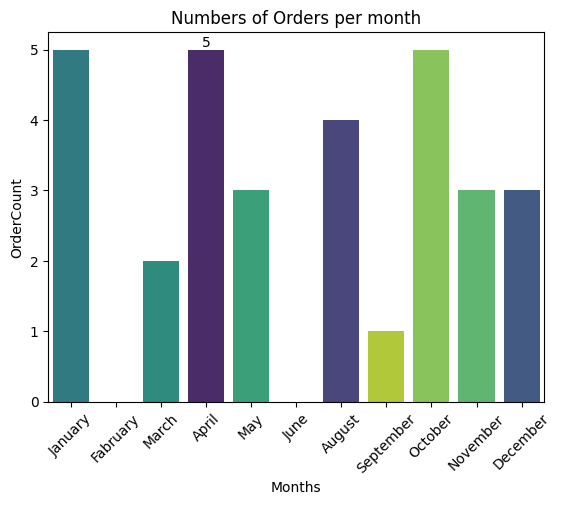

In [18]:
o = ["January", "Fabruary", "March", "April", "May", "June", "August", "September", "October", "November", "December"]
ax= sns.barplot(x = df["Months"], y = df["OrderCount"], order = o,  hue = df["Months"], palette= "viridis")

ax.bar_label(ax.containers[0])
plt.title('Numbers of Orders per month')
plt.xticks(rotation = 45)
plt.show


- By examining the OrderCount for each month, you can identify trends in order volume. For example, if certain months have significantly higher order counts, this could indicate seasonal trends or successful promotional campaigns.
- Understanding monthly order patterns can aid in business planning, such as preparing for high-demand months with adequate stock or launching marketing campaigns at the right time.

# 6. Sales Trend Over Time. 
#Goal: To visualize how sales change over time, you can create a time series plot using OrderDate and Total Amount.

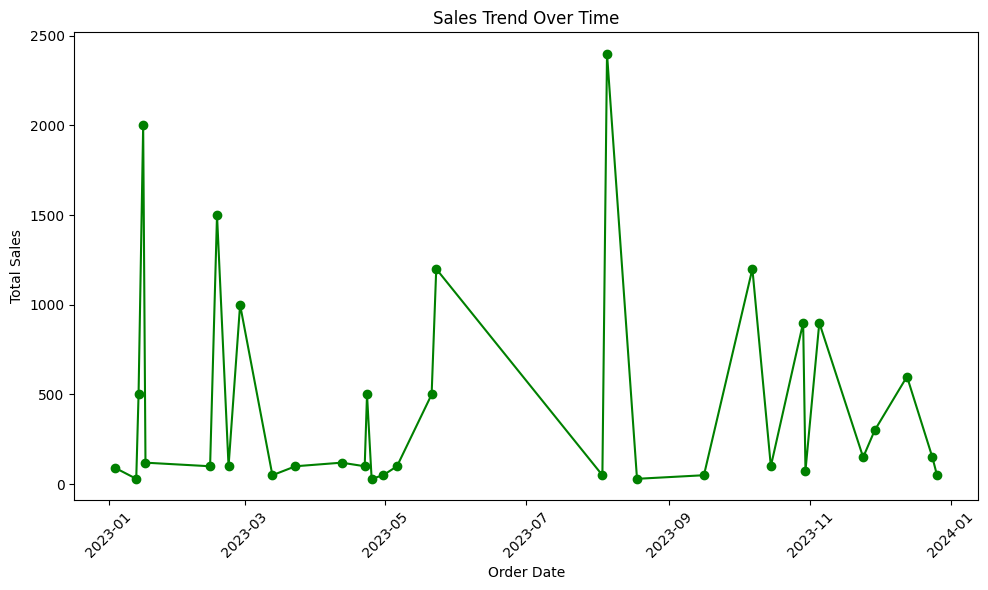

In [21]:
# SQL query to get the sales trend data
query = """
SELECT OrderDate, SUM(TotalAmount) as TotalSales
FROM Orders
GROUP BY OrderDate
ORDER BY OrderDate;
"""

# Execute the query and fetch data
cur.execute(query)
data = cur.fetchall()
# Load the data into a Pandas DataFrame
df = pd.DataFrame(data, columns=['OrderDate', 'TotalSales'])

# Convert the 'OrderDate' column to datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
# Plotting the sales trend over time
plt.figure(figsize=(10, 6))
plt.plot(df['OrderDate'], df['TotalSales'], color='green', marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


-By observing the line plot, you can identify periods of increased or decreased sales. Sharp rises or drops can indicate successful marketing campaigns, seasonal effects, or other events impacting sales.


# 7. Gender-based Purchasing Patterns:
Goal: To see if there are differences in purchasing between male and female customers.

In [50]:
# SQL query to get sales by gender and product category
query = """
SELECT c.Gender, p.Product_Category, SUM(o.TotalAmount) AS TotalSales
FROM Orders o
JOIN Customers c ON o.CustomerID = c.CustomerID
JOIN Products p ON o.Quantity = p.Quantity AND o.Price_per_Unit = p.Price_per_Unit
GROUP BY c.Gender, p.Product_Category
ORDER BY c.Gender, p.Product_Category;
"""

# Ensure that any previous unread results are fetched or cleared
cur.fetchall()  # This will clear the previous unread results if any

# Now execute the query and fetch data
cur.execute(query)
data = cur.fetchall()

# Load the data into a Pandas DataFrame
df = pd.DataFrame(data, columns=['Gender', 'Product Category', 'Total Sales'])

# Reshape the data for visualization
gender_category_sales = df.pivot(index='Gender', columns='Product Category', values='Total Sales')
print(df)
gender_category_sales = df.pivot(index='Gender', columns='Product Category', values='Total Sales')
# Convert the 'Total Sales' to numeric, forcing any errors to NaN
gender_category_sales = gender_category_sales.apply(pd.to_numeric, errors='coerce')

# Replace NaN values with 0 or another placeholder if necessary
gender_category_sales = gender_category_sales.fillna(0)

   Gender Product Category Total Sales
0  Female           Beauty     6110.00
1  Female         Clothing     6290.00
2  Female      Electronics     4470.00
3    Male           Beauty     3495.00
4    Male         Clothing     5590.00
5    Male      Electronics     5310.00


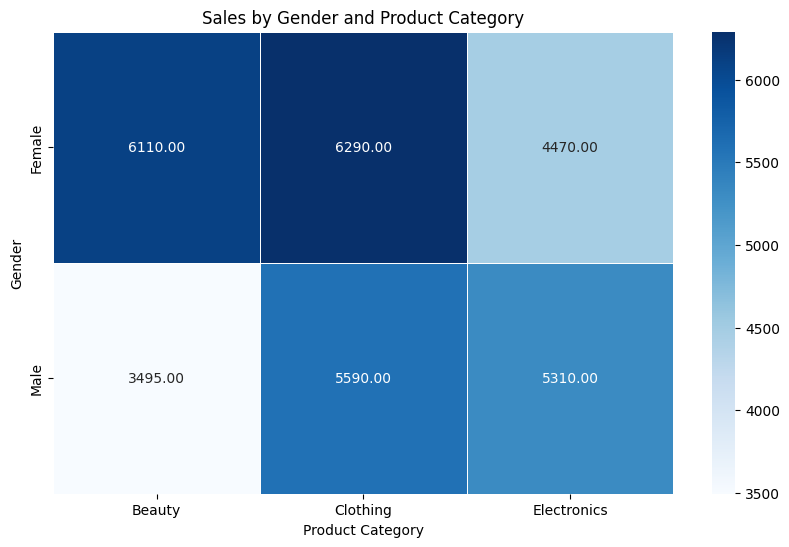

In [51]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Use a heatmap to visualize sales by gender and product category
sns.heatmap(gender_category_sales, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5)

# Add labels and a title
plt.title('Sales by Gender and Product Category')
plt.ylabel('Gender')
plt.xlabel('Product Category')

# Show the plot
plt.show()

- The grouped bar plot displays total sales categorized by gender (male and female) and product category. This allows for a direct comparison of purchasing behavior between male and female customers.
- The grouped bar plot serves as a valuable tool for analyzing gender-based purchasing patterns, highlighting preferences and informing future marketing strategies. By interpreting the data, businesses can optimize their approach to enhance customer engagement and increase sales.

# 8. Age Group vs. Total Spending:. 
Goal: To explore how spending changes with customer age

C:\Users\91790\AppData\Local\Temp\ipykernel_31604\679669212.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age Group', y='TotalSpending', data=df, palette=['yellow', 'green'])
C:\Users\91790\AppData\Local\Temp\ipykernel_31604\679669212.py:29: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Age Group', y='TotalSpending', data=df, palette=['yellow', 'green'])


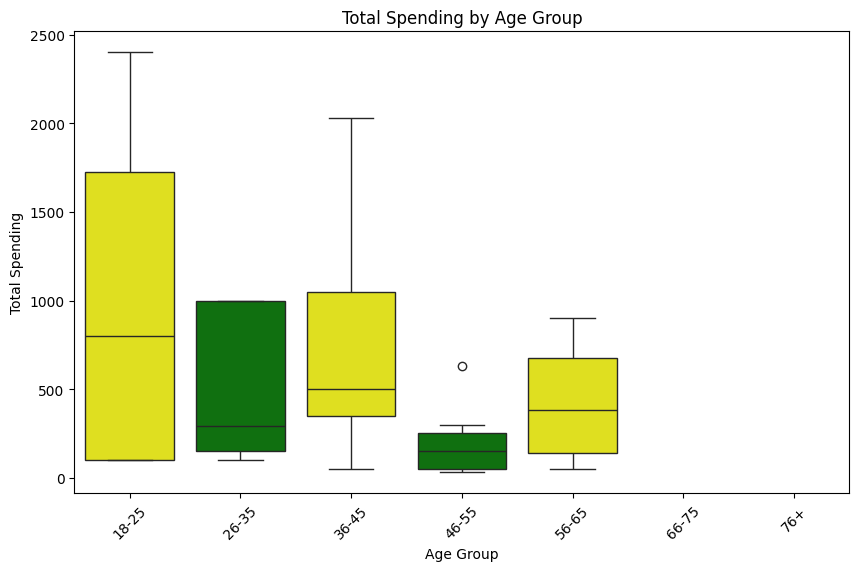

In [93]:
# Sample query (assuming 'data' contains the SQL query results)
query = """ 
    SELECT 
        c.Age, 
        SUM(o.TotalAmount) AS TotalSpending
    FROM 
        Customers c
    JOIN 
        Orders o ON c.CustomerID = o.CustomerID
    GROUP BY 
        c.Age
    ORDER BY 
        c.Age; 
"""
# Execute the query and fetch data
cur.execute(query)
data = cur.fetchall()

# Assuming 'data' contains the SQL query results
df = pd.DataFrame(data, columns=['Age', 'TotalSpending'])

# Create Age Groups (bins)
bins = [18, 25, 35, 45, 55, 65, 75, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Create a box plot for total spending by age group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='TotalSpending', data=df, palette=['yellow', 'green'])
plt.title('Total Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()

- Each box in the plot represents the interquartile range (IQR) for the total spending in each age group. The larger the box, the more variability in spending within that group.
- Median Spending: The line inside each box represents the median spending for that age group. By comparing medians, you can determine which age groups tend to spend the most.
- Outliers: Any points outside the whiskers (extending from the box) are potential outliers, representing customers whose spending is significantly higher or lower than most people in that group.

# 9. Quantity vs. Total Amount:
Goal: To see the relationship between quantity purchased and the total amount spent.

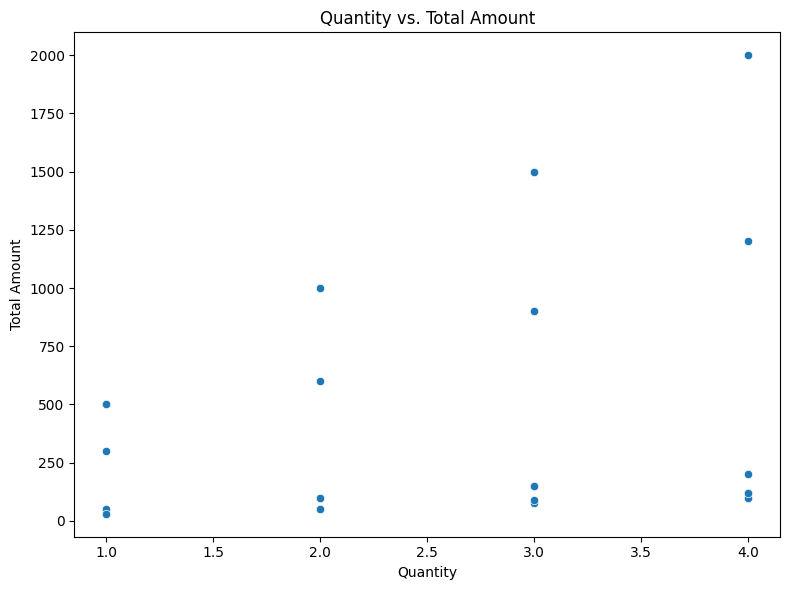

In [65]:
#  query to get quantity and total amount
query = """
SELECT Quantity, TotalAmount AS Total_Amount
FROM Orders;
"""

# Execute the query and fetch data
cur.execute(query)
data = cur.fetchall()

# Load the data into a Pandas DataFrame
df = pd.DataFrame(data, columns=['Quantity', 'Total Amount'])

# Plotting Quantity vs. Total Amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantity', y='Total Amount', data=df)
plt.title('Quantity vs. Total Amount')
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.tight_layout()
plt.show()

- scatter plot illustrating the relationship between Quantity and Total Amount.
- points move from the bottom left to the top right this indicates a positive correlation between Quantity and Total Amount. This suggests that as customers buy more units, they tend to spend more money, which is expected in most retail scenarios.
- Overall, the insights gained from this visualization can inform strategic decisions in pricing, marketing, and inventory management. Identifying trends, outliers, and relationships can lead to a better understanding of customer behavior and ultimately drive more effective business strategies.


# 10. Customer Segmentation by Age and Gender. 
Goal: To visualize customer demographics by gender and age groups.
Visualization: bar chart showing the count of customers by age and gender.

<Figure size 1000x600 with 0 Axes>

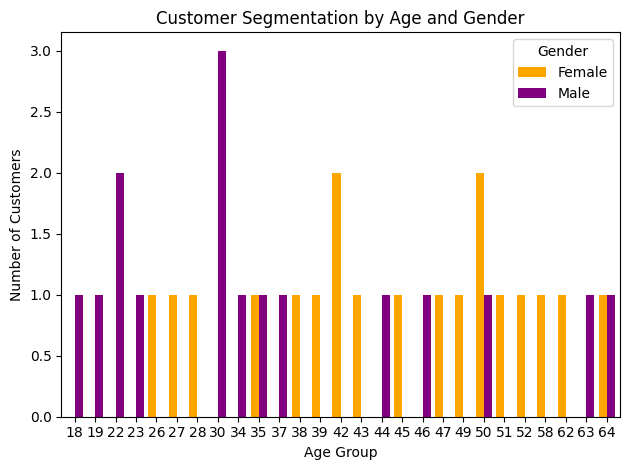

In [70]:
# query to get customer demographics by age and gender
query = """
SELECT Gender, Age, COUNT(*) AS CustomerCount
FROM Customers
GROUP BY Gender, Age
ORDER BY Gender, Age;
"""

# Execute the query and fetch data
cur.execute(query)
data = cur.fetchall()

# Load the data into a Pandas DataFrame
df = pd.DataFrame(data, columns=['Gender', 'Age', 'Customer Count'])

# Reshape the data for visualization
customer_segmentation = df.pivot(index='Age', columns='Gender', values='Customer Count').fillna(0)

# Plotting the customer segmentation by age and gender using a grouped bar chart
plt.figure(figsize=(10, 6))
customer_segmentation.plot(kind='bar', color=['orange', 'purple'], width=0.8)
plt.title('Customer Segmentation by Age and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

- Analyze how customer count varies across different age groups. You may observe specific age ranges where customers are more concentrated.
- overall chart provides valuable insights into customer demographics, which can drive strategic decisions in marketing, product development, and customer engagement efforts.

# Conclusion:
The Retail Store Analysis project provides valuable insights into customer behavior, product performance, and sales trends, offering a clear picture of the store’s operational dynamics. By analyzing demographic patterns, such as age and gender, we can identify key customer segments that drive revenue, allowing for more targeted marketing strategies. The analysis of product categories reveals the most and least popular products, helping optimize inventory management and promotional efforts.

Furthermore, the exploration of sales trends over time highlights seasonal fluctuations and monthly sales patterns, enabling better financial planning and forecasting. These insights help the retail store refine its strategies to boost customer satisfaction, enhance profitability, and streamline operations.

In summary, leveraging data analysis has helped reveal actionable insights that the retail store can use to improve decision-making processes, offering a competitive edge in a dynamic market environment.







